In [ ]:
'''
#create a conda environment
conda create --name infomedia_pycaret python=3.6
#activate environment
conda activate infomedia_pycaret
#install pycaret
pip install pycaret
#create notebook kernel connected with the conda environment
python -m ipykernel install --user --name infomedia_pycaret --display-name "infomedia-pycaret"
'''

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.plotting import scatter_matrix
#from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler
#import statsmodels.api as sm

In [2]:
from pycaret.utils import version
from pycaret.classification import *
version()

'2.2.3'

In [9]:
df = pd.read_csv('dataset_expanded.csv', encoding='ansi')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   topic              185 non-null    object 
 1   doc_pred           185 non-null    float64
 2   bert_sentiment     185 non-null    float64
 3   lexicon_sentiment  185 non-null    float64
 4   topical            185 non-null    int64  
 5   tokens             185 non-null    int64  
 6   entities           185 non-null    int64  
 7   length             185 non-null    int64  
 8   text               185 non-null    object 
 9   text_eng           185 non-null    object 
 10  label              185 non-null    int64  
 11  y_textblob         185 non-null    float64
 12  y_vader            185 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 18.9+ KB


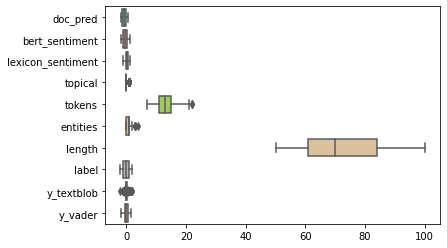

In [11]:
# Box-plot
ax = sns.boxplot(data=df, orient='h', palette='Set2')

In [12]:
# Corr matrix
corr_matrix = df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                1.000000
lexicon_sentiment    0.684845
doc_pred             0.655070
bert_sentiment       0.470467
y_vader              0.444185
y_textblob           0.284257
topical              0.029606
entities            -0.112376
tokens              -0.153550
length              -0.257759
Name: label, dtype: float64

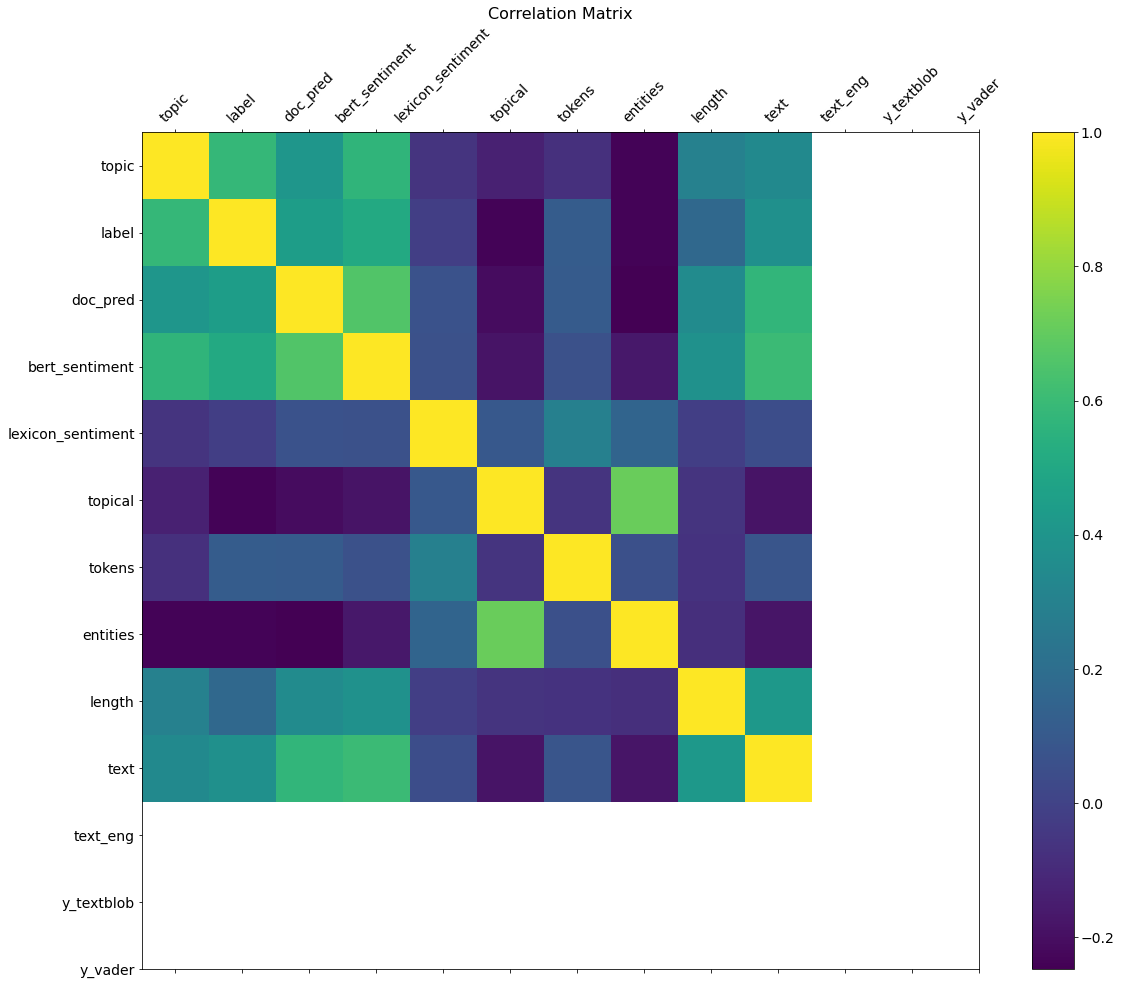

In [7]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [28]:
exp_name = setup(data = df,
                 target = 'label',
                 numeric_features = ['tokens', 'entities'],
                 ignore_features = ['length', 'text', 'text_eng', 'y_textblob', 'y_vader', 'bert_sentiment'])

,Description,Value
0,session_id,7838
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,"-1: 0, -2: 1, 0: 2, 1: 3, 2: 4"
4,Original Data,"(185, 13)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


### Original setup

This means only _topic_ is categorical

In [17]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8141,0.9597,0.8067,0.8376,0.8020,0.7665,0.7784,0.0510
dt,Decision Tree Classifier,0.7910,0.8705,0.7833,0.8141,0.7757,0.7374,0.7561,0.0070
rf,Random Forest Classifier,0.7692,0.9400,0.7600,0.8136,0.7551,0.7107,0.7288,0.1120
xgboost,Extreme Gradient Boosting,0.7673,0.9407,0.7500,0.7753,0.7465,0.7074,0.7221,0.2670
lightgbm,Light Gradient Boosting Machine,0.7378,0.9394,0.7400,0.7850,0.7244,0.6713,0.6874,0.1020
catboost,CatBoost Classifier,0.7378,0.9322,0.7300,0.7602,0.7235,0.6709,0.6879,1.3970
et,Extra Trees Classifier,0.6981,0.9292,0.6833,0.7360,0.6813,0.6193,0.6376,0.1030
lda,Linear Discriminant Analysis,0.5500,0.8470,0.5433,0.5559,0.5205,0.4388,0.4544,0.0070
ridge,Ridge Classifier,0.5333,0.0000,0.5267,0.5370,0.5003,0.4180,0.4343,0.0070
lr,Logistic Regression,0.5192,0.8258,0.5033,0.5050,0.4867,0.3971,0.4121,0.0410


### Original + categorical

Now _topical_ is categorical.

In [19]:
best_model_2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8071,0.9234,0.7867,0.8023,0.7780,0.7557,0.7769,0.1710
gbc,Gradient Boosting Classifier,0.7840,0.9361,0.7600,0.7515,0.7463,0.7265,0.7442,0.0520
dt,Decision Tree Classifier,0.7833,0.8654,0.7667,0.7879,0.7672,0.7268,0.7363,0.0070
catboost,CatBoost Classifier,0.7449,0.9427,0.7300,0.7499,0.7230,0.6780,0.6939,1.3110
rf,Random Forest Classifier,0.7372,0.9470,0.7133,0.7285,0.7108,0.6683,0.6835,0.1050
lightgbm,Light Gradient Boosting Machine,0.7295,0.9275,0.7200,0.7196,0.6956,0.6590,0.6842,0.0560
et,Extra Trees Classifier,0.7147,0.9429,0.6933,0.7224,0.6975,0.6411,0.6526,0.0990
lda,Linear Discriminant Analysis,0.5506,0.8428,0.5433,0.5284,0.5099,0.4379,0.4579,0.0070
lr,Logistic Regression,0.5436,0.8334,0.5300,0.5059,0.5011,0.4266,0.4451,0.0400
ridge,Ridge Classifier,0.5122,0.0000,0.5033,0.4663,0.4618,0.3903,0.4102,0.0070


### Previous (- length)

Same as last one but removing _length_ because of redundancy.

In [21]:
best_model_3 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7590,0.9326,0.7700,0.7665,0.7401,0.6986,0.7157,0.0520
xgboost,Extreme Gradient Boosting,0.7583,0.9253,0.7633,0.7908,0.7364,0.6980,0.7206,0.2670
lightgbm,Light Gradient Boosting Machine,0.7423,0.9158,0.7433,0.7593,0.7161,0.6780,0.7003,0.1030
rf,Random Forest Classifier,0.7353,0.9348,0.7367,0.7573,0.7082,0.6682,0.6890,0.1060
et,Extra Trees Classifier,0.7269,0.9262,0.7267,0.7732,0.7132,0.6573,0.6737,0.1060
catboost,CatBoost Classifier,0.7199,0.9226,0.7233,0.7371,0.6852,0.6493,0.6732,1.3970
dt,Decision Tree Classifier,0.6808,0.7993,0.6833,0.6919,0.6600,0.5985,0.6101,0.0100
lda,Linear Discriminant Analysis,0.5641,0.8044,0.5833,0.6030,0.5414,0.4527,0.4714,0.0070
lr,Logistic Regression,0.5481,0.8117,0.5733,0.5858,0.5294,0.4345,0.4500,0.0180
ridge,Ridge Classifier,0.5333,0.0000,0.5533,0.5669,0.5063,0.4138,0.4335,0.0060


In [26]:
print(best_model_3)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8908, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## OPTIMAL: previous - bert_sentiment

Same as last one but removing _bert_sentiment_.

In [29]:
best_model_4 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8596,0.9559,0.8700,0.9064,0.8585,0.8243,0.8357,0.0510
xgboost,Extreme Gradient Boosting,0.8141,0.9519,0.8267,0.8532,0.8057,0.7673,0.7822,0.1490
catboost,CatBoost Classifier,0.7833,0.9525,0.8017,0.8209,0.7724,0.7272,0.7405,1.1080
lightgbm,Light Gradient Boosting Machine,0.7827,0.9364,0.7817,0.7956,0.7659,0.7271,0.7407,0.0700
dt,Decision Tree Classifier,0.7821,0.8654,0.7933,0.8196,0.7709,0.7274,0.7405,0.0070
rf,Random Forest Classifier,0.7436,0.9399,0.7483,0.7562,0.7242,0.6763,0.6906,0.1130
et,Extra Trees Classifier,0.7135,0.9412,0.7083,0.7283,0.7041,0.6381,0.6468,0.1030
ridge,Ridge Classifier,0.4705,0.0000,0.4750,0.4347,0.4181,0.3342,0.3533,0.0070
knn,K Neighbors Classifier,0.4635,0.7534,0.4717,0.5447,0.4544,0.3305,0.3455,0.0300
lr,Logistic Regression,0.4628,0.7984,0.4717,0.4487,0.4235,0.3275,0.3427,0.0170


### Optimized + expanded

Optimal setup + extra sentiment values.

In [23]:
best_model_5 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7519,0.9541,0.7400,0.7644,0.7324,0.6872,0.7016,0.0540
et,Extra Trees Classifier,0.7288,0.9392,0.7233,0.7677,0.7120,0.6580,0.6733,0.1010
xgboost,Extreme Gradient Boosting,0.7135,0.9279,0.6967,0.7015,0.6807,0.6375,0.6536,0.1650
dt,Decision Tree Classifier,0.6994,0.8113,0.6967,0.6929,0.6741,0.6216,0.6340,0.0070
catboost,CatBoost Classifier,0.6827,0.9183,0.6767,0.7053,0.6533,0.6010,0.6228,1.2800
rf,Random Forest Classifier,0.6821,0.9254,0.6667,0.6806,0.6447,0.5987,0.6209,0.1130
lightgbm,Light Gradient Boosting Machine,0.6667,0.9017,0.6533,0.6946,0.6504,0.5797,0.5951,0.0620
lda,Linear Discriminant Analysis,0.5359,0.8260,0.5333,0.6077,0.5294,0.4197,0.4357,0.0090
lr,Logistic Regression,0.5295,0.8371,0.5267,0.5687,0.5206,0.4121,0.4261,0.0210
ridge,Ridge Classifier,0.5135,0.0000,0.5167,0.5670,0.5039,0.3923,0.4083,0.0070


### Optimized + VADER

In [25]:
best_model_6 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7756,0.9428,0.7667,0.7938,0.7604,0.7173,0.7324,0.0540
xgboost,Extreme Gradient Boosting,0.7756,0.9434,0.7700,0.8000,0.7610,0.7180,0.7318,0.1710
rf,Random Forest Classifier,0.7596,0.9288,0.7433,0.7855,0.7407,0.6974,0.7127,0.1070
dt,Decision Tree Classifier,0.7590,0.8485,0.7533,0.7608,0.7332,0.6963,0.7141,0.0090
lightgbm,Light Gradient Boosting Machine,0.7526,0.9090,0.7433,0.7706,0.7296,0.6887,0.7078,0.0660
catboost,CatBoost Classifier,0.7365,0.9236,0.7233,0.7602,0.7186,0.6686,0.6838,1.2750
et,Extra Trees Classifier,0.7288,0.9343,0.7233,0.7669,0.7186,0.6595,0.6735,0.0990
lda,Linear Discriminant Analysis,0.5744,0.8268,0.5700,0.6251,0.5680,0.4637,0.4764,0.0070
ridge,Ridge Classifier,0.5667,0.0000,0.5633,0.5932,0.5437,0.4544,0.4732,0.0070
lr,Logistic Regression,0.5513,0.8257,0.5367,0.5927,0.5390,0.4354,0.4506,0.0170


### Optimized + TextBlob

In [27]:
best_model_7 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8077,0.9452,0.8000,0.8512,0.8024,0.7561,0.7695,0.1640
rf,Random Forest Classifier,0.7994,0.9527,0.7933,0.8235,0.7913,0.7458,0.7555,0.1110
gbc,Gradient Boosting Classifier,0.7686,0.9423,0.7700,0.8084,0.7670,0.7077,0.7177,0.0550
et,Extra Trees Classifier,0.7609,0.9549,0.7667,0.7716,0.7466,0.6983,0.7112,0.1040
catboost,CatBoost Classifier,0.7609,0.9464,0.7567,0.7784,0.7497,0.6975,0.7070,1.2970
lightgbm,Light Gradient Boosting Machine,0.7603,0.9348,0.7500,0.7951,0.7538,0.6958,0.7066,0.0670
dt,Decision Tree Classifier,0.7532,0.8436,0.7567,0.7683,0.7401,0.6884,0.6994,0.0070
lda,Linear Discriminant Analysis,0.5962,0.8698,0.6000,0.6010,0.5807,0.4942,0.5061,0.0070
ridge,Ridge Classifier,0.5808,0.0000,0.5900,0.6093,0.5673,0.4766,0.4927,0.0090
lr,Logistic Regression,0.5731,0.8601,0.5733,0.5714,0.5516,0.4654,0.4786,0.0170
